# `geom_curve()`


Specific arguments:

* `curvature` A numeric value that indicates the amount of curvature. Negative values produce left-hand curves, positive values produce right-hand curves and zero produces a straight line. Default = 0.5.

* `angle` A numeric value between 0 and 180 that indicates the amount by which the control points of the curve should be skewed. Values less than 90 skew the curve towards the start point and values greater than 90 skew the curve towards the end point. Default = 90.

* `ncp` The number of control points used to draw the curve. More control points produce a smoother curve. Default = 5.

In [1]:
import pandas as pd
from lets_plot import *


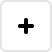
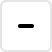
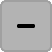
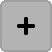
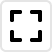
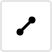
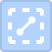
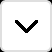
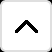
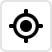
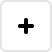
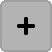
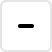
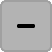
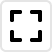
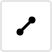
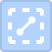
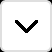
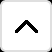
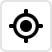

In [2]:
LetsPlot.setup_html()

In [3]:
def curve_plot(curvature=0.5, angle=90.0, ncp=5):
    return ggplot() \
            + geom_curve(x=-10, y=1, xend=10, yend=-1, 
                         curvature=curvature, angle=angle, ncp=ncp,
                         arrow=arrow(ends='both')) \
            + ggtitle("curvature={0}, angle={1}, ncp={2}".format(curvature, angle, ncp)) \
            + xlim(-15,15)

In [4]:
gggrid([
    curve_plot(angle=0),
    curve_plot(ncp=1),
    curve_plot(angle=45),
    curve_plot(curvature=-1, angle=45),
    curve_plot(curvature=0.7, angle=30),
    curve_plot(curvature=-0.7, angle=30),
], ncol=2)

#### Aesthetics to Adjust Start/End 

If a curve is used in combination with a point layer, objects may overlap.
To avoid this, use aesthetics to offset the start and end coordinates according to the point size:
`size_start, size_end` and `stroke_start,stroke_end`.

Plus there is an optional `spacer` parameter that defines a value in pixels to shorten the curve by moving the start/end.

In [5]:
x = [-1, 0, 1]
y = [-1, 1, -1]
shape = [1, 16, 21]
size = [1, 2, 3]
stroke = [1, 0, 2]
x_end = x[1:] + [x[0]]
y_end = y[1:] + [y[0]]

data = {
    'x': x,
    'y': y,
    'shape': shape,
    'size': size,
    'stroke': stroke,
    'x_end': x_end,
    'y_end': y_end
}

Default plot:

In [6]:
plot = ggplot(data, aes('x','y')) \
    + geom_point(aes(size='size', shape='shape', stroke='stroke'), color='#4575b4', fill='#abd9e9') \
    + scale_size(range=[20,30], guide='none') \
    + scale_stroke(range=[0,10], guide='none') \
    + scale_shape_identity() \
    + lims(x=[-1.5, 1.5], y=[-1.5, 1.5])

plot + geom_curve(aes(xend='x_end', yend='y_end'),
                  curvature=-0.2,
                  arrow=arrow(ends='both')) 

Let's define new aesthetics: 

In [7]:
size_end = size[1:] + [size[0]]
stroke_end = stroke[1:] + [stroke[0]]

data.update({
    'size_end': size_end,
    'stroke_end': stroke_end,
})
plot + geom_curve(aes(xend='x_end', yend='y_end', 
                      size_start='size', size_end='size_end',
                      stroke_start='stroke', stroke_end='stroke_end'),
                  curvature=-0.2,
                  arrow=arrow(ends='both')) 

Additional padding:

In [8]:
plot + geom_curve(aes(xend='x_end', yend='y_end', 
                      size_start='size', size_end='size_end',
                      stroke_start='stroke', stroke_end='stroke_end'),
                  curvature=-0.2,
                  arrow=arrow(ends='both'),
                  spacer=5) 

#### Simple Graph Visualization

In [9]:
nodes = pd.DataFrame({
    'node': ["Living\nThings", "Animals", "Plants", "Dogs", "Cows", "Herbs"],
    'x': [0, -1, 1, -2, 0, 2],
    'y': [1, 0, 0, -1, -1, -1]
})

edges = pd.DataFrame({
    'from': ["Animals", "Plants", "Dogs", "Cows", "Cows", "Herbs"],
    'to': ["Living\nThings", "Living\nThings", "Animals", "Animals", "Herbs", "Plants"],
    'relation': ["is", "is", "is", "is", "eat", "is"]
})
edges = pd.merge(edges, nodes, left_on='from', right_on='node')
edges = pd.merge(edges, nodes, left_on='to', right_on='node', suffixes=('', '_to'))
edges

,from,to,relation,node,x,y,node_to,x_to,y_to
0,Animals,Living\nThings,is,Animals,-1,0,Living\nThings,0,1
1,Plants,Living\nThings,is,Plants,1,0,Living\nThings,0,1
2,Dogs,Animals,is,Dogs,-2,-1,Animals,-1,0
3,Cows,Animals,is,Cows,0,-1,Animals,-1,0
4,Cows,Herbs,eat,Cows,0,-1,Herbs,2,-1
5,Herbs,Plants,is,Herbs,2,-1,Plants,1,0


In [10]:
ggplot(nodes, aes(x='x', y='y')) \
  + geom_curve(aes(x='x', y='y', xend='x_to', yend='y_to', color='relation'), data=edges, 
               size_end=25,
               curvature=0.2, arrow=arrow()) \
  + geom_point(color='#2166ac', fill='#d1e5f0', shape=21, size=25) \
  + scale_color_manual(['#2166ac', '#d6604d']) \
  + geom_text(aes(label='node')) \
  + coord_cartesian([-3,3],[-1.5,1.5]) \
  + theme_void()

#### Use to Annotate Objects

In [11]:
mpg = pd.read_csv ("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
mpg.head(3)

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [12]:
mpg_cyl5 = mpg.loc[mpg['cyl'] == 5]

ggplot(mpg, aes('displ', 'hwy')) \
  + geom_point(data=mpg_cyl5, color='#de77ae', size=5) \
  + geom_point() \
  + geom_text(label="Five-cylinder engine", x=4, y=37, hjust=0, color='#c51b7d', size=10) \
  + geom_curve(data=mpg_cyl5, xend=3.95, yend=37,
               size_start=5,
               curvature=0.1, arrow=arrow(length=6, ends='first'),
               color='#c51b7d')

#### On LiveMap

In [13]:
def set_stay_time(data):
    current_moves = moves_df[(moves_df.departure == data['name'])|(moves_df.arrival == data['name'])]
    years = current_moves.year.sort_values().unique()
    years_combined = []
    for year in years:
        if len(years_combined) == 0 or years_combined[-1][1] + 1 != year:
            years_combined.append((year, year))
        else:
            years_combined[-1] = (years_combined[-1][0], year)
    years_combined = [str(year_from) if year_from == year_to else '{0}-{1}'.format(year_from, year_to) \
                      for year_from, year_to in years_combined]
    data['years'] = ', '.join(years_combined)
    return data

places_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/pushkin/places.csv')
moves_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/pushkin/moves.csv')
df = moves_df.merge(places_df, left_on='departure', right_on='name')\
             .rename(columns=dict(longitude='from_lon', latitude='from_lat'))\
             .drop(columns=['name'])\
             .merge(places_df, left_on='arrival', right_on='name')\
             .rename(columns=dict(longitude='to_lon', latitude='to_lat'))\
             .drop(columns=['name'])
places_df['years'] = ''
places_df = places_df.apply(set_stay_time, axis=1)
places_df.head(3)

,name,latitude,longitude,years
0,Erzurum,39.908610,41.276940,1829
1,Boldino,55.004477,45.308850,"1830, 1833"
2,Vitebsk,55.187222,30.205116,"1820, 1824"


In [14]:
ggplot() \
    + geom_livemap(const_size_zoomin=3) \
    + geom_curve(aes(x='from_lon', y='from_lat', xend='to_lon', yend='to_lat', color='path'), data=df,
                 size_start=2, size_end=2,
                 spacer=0.3,
                 size=0.5,
                 curvature=0.2,
                 arrow=arrow(type='open', length=4),
                 tooltips='none') \
    + geom_point(aes(x='longitude', y='latitude'), data=places_df, size=2, color='black',
                 tooltips=layer_tooltips().title('@name').line('visited in|@years')) \
    + scale_color_manual(name='trip name', values=['#addd8e', '#e34a33', '#8856a7', '#2c7fb8',
                                                   '#1c9099', '#006d2c', '#fec44f', '#636363']) \
    + coord_cartesian(xlim=[26, 58], ylim=[38, 62]) \
    + ggtitle("Alexander Pushkin's Trips") \
    + theme_void()